<a href="https://colab.research.google.com/github/ALuceroMA/B1-Procesamiento-de-Datos-con-Python-2020-2021/blob/master/Copia_de_Diabetes_outcome_a_machine_learning_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción de diabetes

## Equipo 7:
- Alonso Contreras Guadalupe
- Moreno Abad Angeles Lucero
- Rodríguez Rodríguez Areli
- Velázquez Gil Blanca Andrea

## ¿Qué es un proyecto de Machine Learning?

Machine Learning es una rama de la inteligencia artificial (IA) y las ciencias de la computación que se centra en el uso de datos y algoritmos para imitar la forma en que los humanos aprenden, mejorando gradualmente su precisión (¿Qué Es Machine Learning? | IBM, n.d.).

Un proyecto de machine learning se centra en el desarrollo de sistemas o algoritmos capaces de aprender de manera automatizada y mejorar su rendimiento sin intervención humana directa. Este enfoque se basa en la capacidad de los programas computacionales para acceder a datos y utilizarlos para tomar decisiones o realizar predicciones.

El proceso de aprendizaje en el machine learning implica proporcionar datos, instrucciones o ejemplos al programa para que identifique patrones y adquiera información clave, permitiéndole tomar decisiones basadas en datos reales. Los algoritmos de machine learning pueden clasificarse en varias categorías principales, incluyendo algoritmos supervisados, no supervisados, semi-supervisados y de aprendizaje por refuerzo. Estos algoritmos permiten analizar y procesar grandes volúmenes de datos de manera eficiente, con el objetivo de identificar oportunidades, riesgos y tomar decisiones mediante la predicción de información relevante.

## Introducción
La diabetes es una enfermedad metabólica crónica caracterizada por niveles elevados de glucosa en sangre (o azúcar en sangre), que con el tiempo conduce a daños graves en el corazón, los vasos sanguíneos, los ojos, los riñones y los nervios.
Aproximadamente 62 millones de personas en las Américas (422 millones de personas en todo el mundo) tienen diabetes, la mayoría vive en países de ingresos bajos y medianos, y 244 084 muertes (1.5 millones en todo el mundo) se atribuyen directamente a la diabetes cada año. Tanto el número de casos como la prevalencia de diabetes han aumentado constantemente durante las últimas décadas. (OMS, 2023)


## Objetivo
Construir un modelo de machin learning que pueda predecir con precisión si un paciente tiene diabetes en función a los niveles de hemoglobina glicosilada (HbA1c) y glucosa en sangre.

Las caracteritics del dataset son:
- Género: esta es una característica categórica que puede ser "masculina" o "femenina".
- Edad: Esta es una característica numérica que representa la edad del paciente en años.
- Hipertensión: esta es una característica categórica que puede ser "0" (sin hipertensión) o "1" (hipertensión).
- Heart_disease: Esta es una característica categórica que puede ser "0" (sin enfermedad cardíaca) o "1" (enfermedad cardíaca).
- Smoke_history: Esta es una característica categórica que puede ser "nunca", "nunca" o "fumador actual".
- IMC: Esta es una característica numérica que representa el índice de masa corporal del paciente.
- HbA1c_level: Esta es una característica numérica que representa el nivel de HbA1c del paciente, que es una medida del control del azúcar en sangre durante los últimos 3 meses.
- Blood_glucose_level: Esta es una característica numérica que representa el nivel de glucosa en sangre del paciente en el momento de la prueba.
- Diabetes: esta es la variable objetivo que predecirá el modelo. Es una característica categórica que puede ser "0" (sin diabetes) o "1" (diabetes).


## Dataset seleccionado:
https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

In [ ]:
import pandas as pd
from scipy import stats

In [ ]:
df_original = pd.read_csv('/content/drive/MyDrive/Copia de Proyecto Equipo 7/archive.zip', sep = ',', index_col = 0)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_original.head(10)

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,,,,,,,,
Female,80.0,0,1,never,25.19,6.6,140,0
Female,54.0,0,0,No Info,27.32,6.6,80,0
Male,28.0,0,0,never,27.32,5.7,158,0
Female,36.0,0,0,current,23.45,5.0,155,0
Male,76.0,1,1,current,20.14,4.8,155,0
Female,20.0,0,0,never,27.32,6.6,85,0
Female,44.0,0,0,never,19.31,6.5,200,1
Female,79.0,0,0,No Info,23.86,5.7,85,0
Male,42.0,0,0,never,33.64,4.8,145,0


In [ ]:
df_original

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,,,,,,,,
Female,80.0,0,1,never,25.19,6.6,140,0
Female,54.0,0,0,No Info,27.32,6.6,80,0
Male,28.0,0,0,never,27.32,5.7,158,0
Female,36.0,0,0,current,23.45,5.0,155,0
Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...
Female,80.0,0,0,No Info,27.32,6.2,90,0
Female,2.0,0,0,No Info,17.37,6.5,100,0
Male,66.0,0,0,former,27.83,5.7,155,0


In [ ]:
df_original.columns

Index(['age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi',
       'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [ ]:
#Columnas clave que definen nuestro estudio:
columnas_clave = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']

In [ ]:
#Fraccion en la que se desea dividr el dataframe:
fraccion = 0.1

# Reducir el número de filas de forma proporcional:
df_reducido = df_original.sample(frac=fraccion, random_state=1) # muestra aleatoria del 10% de los datos

#Redefinimos columnas:
df_reducido = df_reducido[columnas_clave]
df_reducido

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,,,,,,,
Female,73.0,0,0,26.62,5.0,155,0
Female,35.0,0,0,27.32,4.5,130,0
Male,38.0,0,0,27.32,6.2,130,0
Female,75.0,0,0,31.11,6.2,159,0
Female,51.0,0,0,39.57,6.2,240,1
...,...,...,...,...,...,...,...
Female,36.0,0,1,31.42,3.5,160,0
Female,35.0,0,0,22.67,4.5,85,0
Male,58.0,0,1,27.32,5.7,100,0


In [ ]:
#Reindexando:
df_reducido = df_reducido.reset_index(drop=True)
df_reducido

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,73.0,0,0,26.62,5.0,155,0
1,35.0,0,0,27.32,4.5,130,0
2,38.0,0,0,27.32,6.2,130,0
3,75.0,0,0,31.11,6.2,159,0
4,51.0,0,0,39.57,6.2,240,1
...,...,...,...,...,...,...,...
9995,36.0,0,1,31.42,3.5,160,0
9996,35.0,0,0,22.67,4.5,85,0
9997,58.0,0,1,27.32,5.7,100,0
9998,27.0,0,0,24.68,5.0,160,0


In [ ]:
#Copia del dataframe con el que trabajaremos:
df = df_reducido.copy()

#Dimesiones del dataframe
df.shape

(10000, 7)

In [ ]:
#Tipos de datos en cada columna:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10000 non-null  float64
 1   hypertension         10000 non-null  int64  
 2   heart_disease        10000 non-null  int64  
 3   bmi                  10000 non-null  float64
 4   HbA1c_level          10000 non-null  float64
 5   blood_glucose_level  10000 non-null  int64  
 6   diabetes             10000 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 547.0 KB


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

<Axes: >

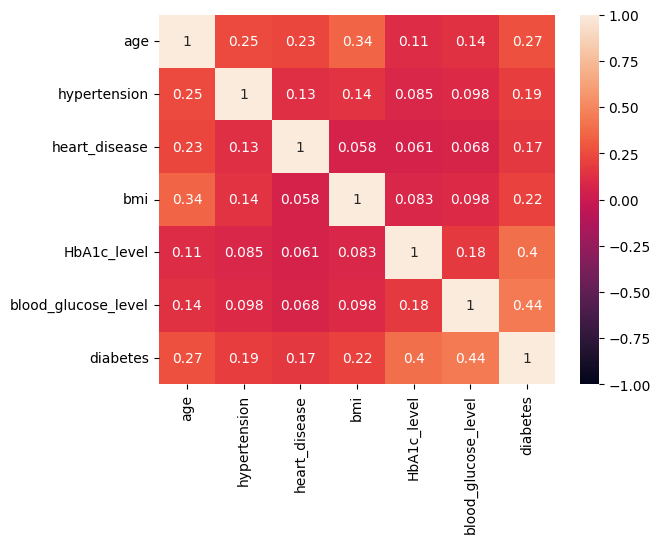

In [ ]:
# Analisis de correlacion de los datos para elegir un par de datos para un futuro modelo ML
sns.heatmap(df.corr(), vmin= -1, vmax= 1, annot= True)

Los datos con mayor correlación son HbA1c y glucosa en sangre.

In [ ]:
df['blood_glucose_level'].unique()

array([155, 130, 159, 240, 140, 126, 145,  85, 158,  80, 200, 160, 100,
        90, 300, 280, 260, 220])

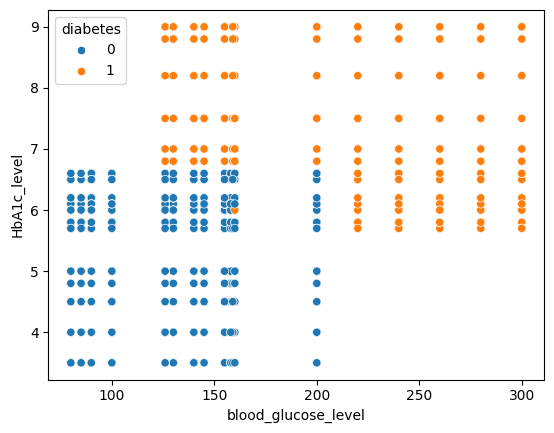

In [ ]:
x, y = make_blobs(n_samples=1000, centers=2, n_features=3)
sns.scatterplot(data= df, x= 'blood_glucose_level', y= 'HbA1c_level', hue= 'diabetes')
plt.show()

In [ ]:
def particionar(entradas, salidas, porcentaje_entrenamiento, porcentaje_validacion, porcentaje_prueba):
    temp_size = porcentaje_validacion + porcentaje_prueba
    x_train, x_temp, y_train, y_temp = train_test_split(entradas, salidas, test_size =temp_size)
    if(porcentaje_validacion > 0):
        test_size = porcentaje_prueba/temp_size
        x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size = test_size)
    else:
        return [x_train, None, x_temp, y_train, None, y_temp]
    return [x_train, x_val, x_test, y_train, y_val, y_test]

In [ ]:
#Usando el 60% para entrenamiento, 10% para validacion y de 30% prueba
[x_train, x_val, x_test, y_train, y_val, y_test] = particionar(df[['blood_glucose_level', 'HbA1c_level']], df['diabetes'],0.60,0.10,0.30)

print('Total del filas del dataset: ', df.shape[0])
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

Total del filas del dataset:  10000
(6000, 2)
(1000, 2)
(3000, 2)


In [ ]:
#Usando el 70% para entrenamiento, 10% para la validacion y 20% de prueba
[x_train, x_val, x_test, y_train, y_val, y_test] = particionar(df[['blood_glucose_level', 'HbA1c_level']], df['diabetes'], 0.70, 0.10, 0.20)

print('Total del filas del dataset: ', df.shape[0])
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

Total del filas del dataset:  10000
(6999, 2)
(1000, 2)
(2001, 2)


Utilizaremos validacion cruzada para evaluar el modelo

In [ ]:
import numpy as np
from sklearn.model_selection import KFold

In [ ]:
data = df.copy()
k = 1000

kfold = KFold(n_splits=k, shuffle=True, random_state=42)

ciclo = 1
for indices_train, indices_test in kfold.split(data):
    print("Ciclo: " + str(ciclo))
    print("\t datos para entrenamiento:" + str(data.iloc[indices_train]))
    print("\t datos para prueba:" + str(data.iloc[indices_test]))
    ciclo += 1

x, y = make_blobs(n_samples=1000, centers=2, n_features=2)

K = y.shape[0]
random_seed = 48
aleatorio = True

kfold = KFold(n_splits=K, shuffle=aleatorio, random_state=random_seed)
ciclo = 1
for indices_train, indices_test in kfold.split(x):
    print("Ciclo: "+str(ciclo))

    print("Usare "+str(x[indices_train].shape)+" datos para entrenar (entrada)")
    print("Usare "+str(y[indices_train].shape)+" datos para entrenar (salida)")

    print("Usare "+str(x[indices_test].shape)+" datos para probar (entrada)")
    print("Usare "+str(y[indices_test].shape)+" datos para probar (salida)")
    ciclo+=1

## Árboles de decisión

In [ ]:
import numpy as np
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

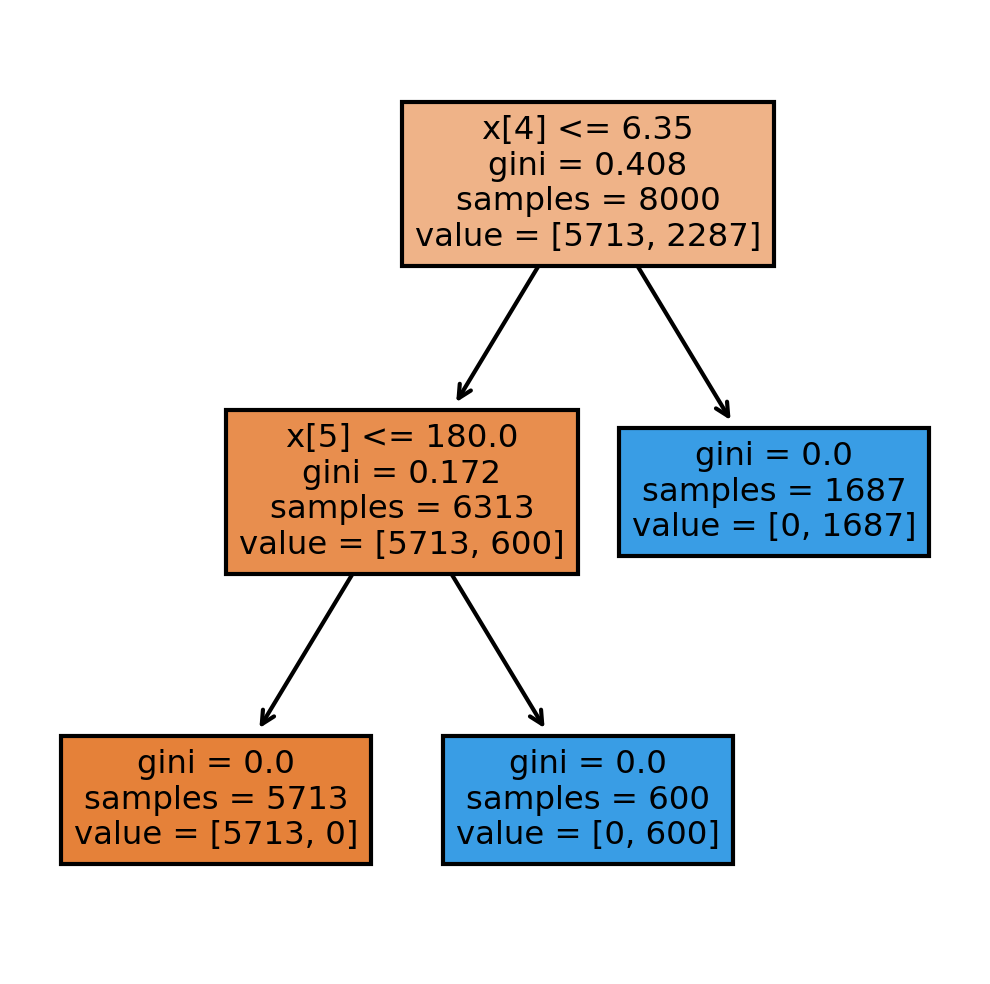

In [ ]:
#Caracteristicas:

#Nivel HA1bc | Nivel de glucosa como mínimo para tener diabetes
glucose_level_diabetes = 200
HbA1c_level_diabetes = 6.5

#Variable objetivo 'diabetes':
df['diabetes'] = ((df['blood_glucose_level'] >= glucose_level_diabetes) | (df['HbA1c_level'] >= HbA1c_level_diabetes)).astype(int)

#Características y salida
X = df.drop('diabetes', axis=1)
Y = df['diabetes']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Crear el modelo de árbol de decisiones
arbol = tree.DecisionTreeClassifier()
arbol = arbol.fit(X_train, Y_train)

#Arbol de forma esquemática
plt.figure(figsize = (4,4), dpi = 300)
tree.plot_tree(arbol,filled = True);
plt.show()

# Algoritmo no supervisado

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [ ]:
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,73.0,0,0,26.62,5.0,155,0
1,35.0,0,0,27.32,4.5,130,0
2,38.0,0,0,27.32,6.2,130,0
3,75.0,0,0,31.11,6.2,159,0
4,51.0,0,0,39.57,6.2,240,1


NameError: name 'Hab1c_level' is not defined

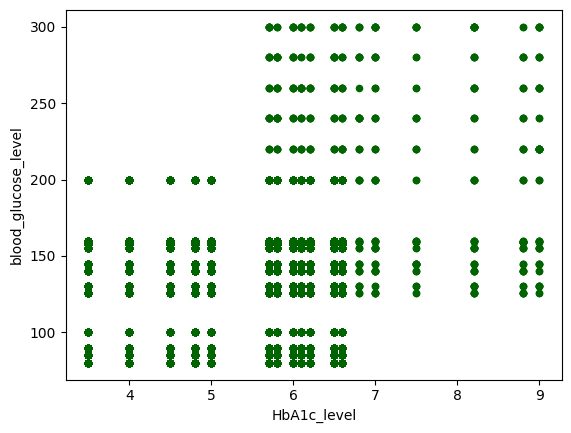

In [ ]:
df.plot.scatter(x=4, y=5, c='DarkGreen')
plt.xlabel(Hab1c_level)
plt.ylabel(Blood-glucose-level)
plt.show()

In [ ]:
min_max_scaler = MinMaxScaler()
df = min_max_scaler.fit_transform(df)
df = pd.DataFrame(df) # Convertimos a Dataframe

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'WCSS')

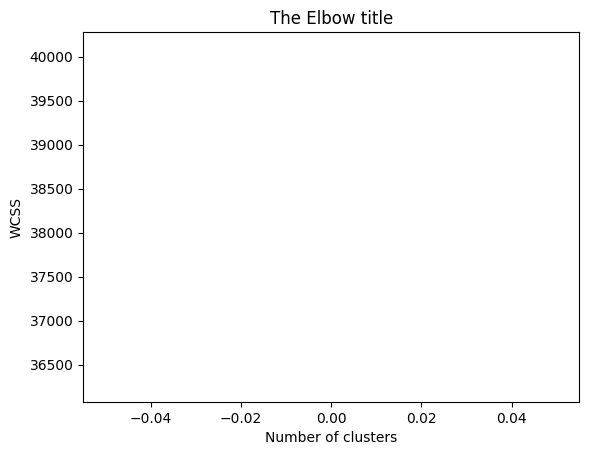

In [ ]:
#Encontrando numero de clusters WCSS and elbow method wcss=[]

import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []  # Initialize wcss as an empty list

for i in np.arange(0, 1):
  kmeans = KMeans (1)
  kmeans.fit(x)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(0, 1)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
# Mostramos los datos escalados
df.head(3)

,0,1,2,3,4,5,6
0,0.912412,0.0,0.0,0.269906,0.272727,0.340909,0.0
1,0.436937,0.0,0.0,0.281280,0.181818,0.227273,0.0
2,0.474474,0.0,0.0,0.281280,0.490909,0.227273,0.0


In [ ]:
# Aplicamos k-means a nuestro dataset
km = KMeans(n_clusters=3, init='random',
            max_iter=200, random_state=0)
y_km = km.fit_predict(df)
y_km[0:9]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 1, 0, 2, 1, 0, 1, 1], dtype=int32)

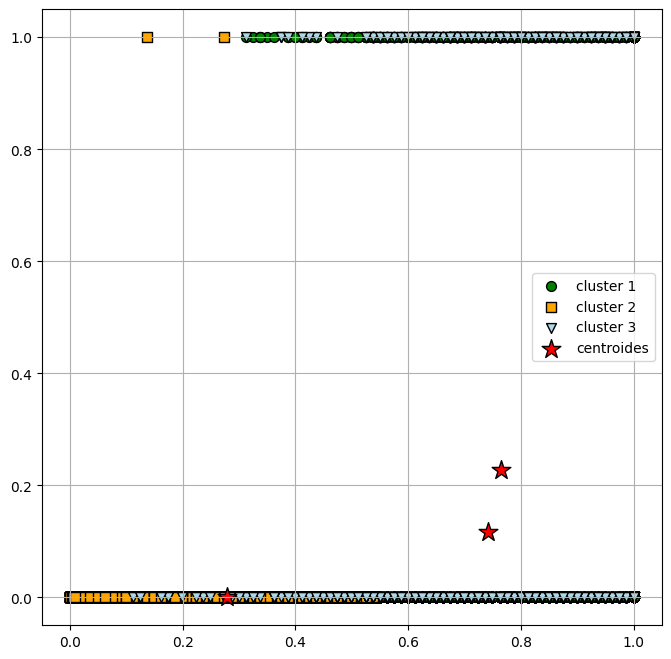

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(df[y_km == 0][0], df[y_km == 0][1],
            s=50, c='green', marker='o',
            edgecolor='black', label='cluster 1')
plt.scatter(df[y_km == 1][0], df[y_km == 1][1],
            s=50, c='orange', marker='s',
            edgecolor='black', label='cluster 2')
plt.scatter(df[y_km == 2][0], df[y_km == 2][1],
            s=50, c='lightblue', marker='v',
            edgecolor='black', label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1], s=200,
            marker='*', c='red',
            edgecolor='black', label='centroides')
plt.legend(loc="best")
plt.grid()
plt.show()

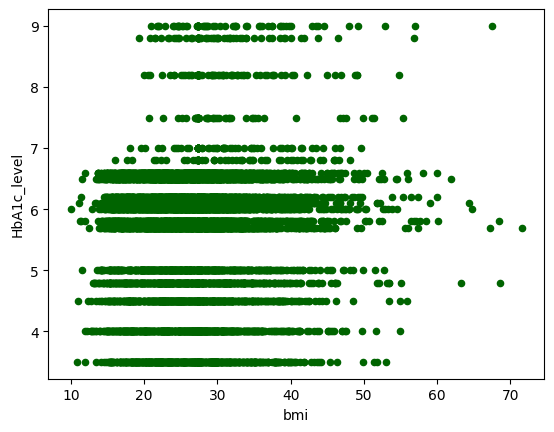

In [ ]:
df.plot.scatter(x=3, y=4, c='DarkGreen')
plt.show()

In [ ]:
min_max_scaler = MinMaxScaler()
df = min_max_scaler.fit_transform(df)
df = pd.DataFrame(df) # Convertimos a Dataframe

In [ ]:
# Mostramos los datos escalados
df.head(3)

,0,1,2,3,4,5,6
0,0.912412,0.0,0.0,0.269906,0.272727,0.340909,0.0
1,0.436937,0.0,0.0,0.281280,0.181818,0.227273,0.0
2,0.474474,0.0,0.0,0.281280,0.490909,0.227273,0.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'WCSS')

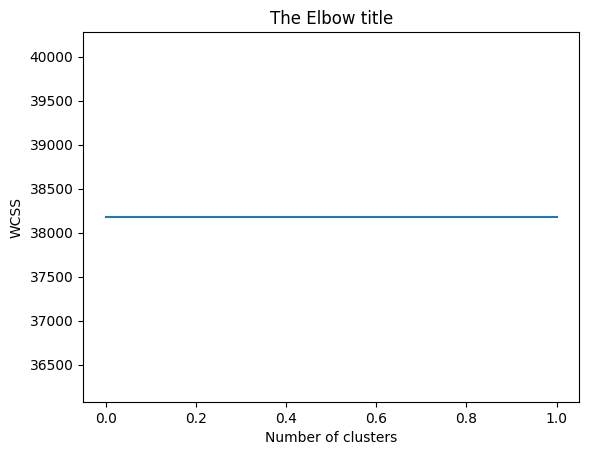

In [ ]:
#Encontrando numero de clusters WCSS and elbow method wcss=[]

import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []  # Initialize wcss as an empty list

for i in np.arange(0, 2):
  kmeans = KMeans (1)
  kmeans.fit(x)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(0, 2)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
# Aplicamos k-means a nuestro dataset
km = KMeans(n_clusters=3, init='random',
            max_iter=200, random_state=0)
y_km = km.fit_predict(df)
y_km[0:9]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 1, 0, 2, 1, 0, 1, 1], dtype=int32)

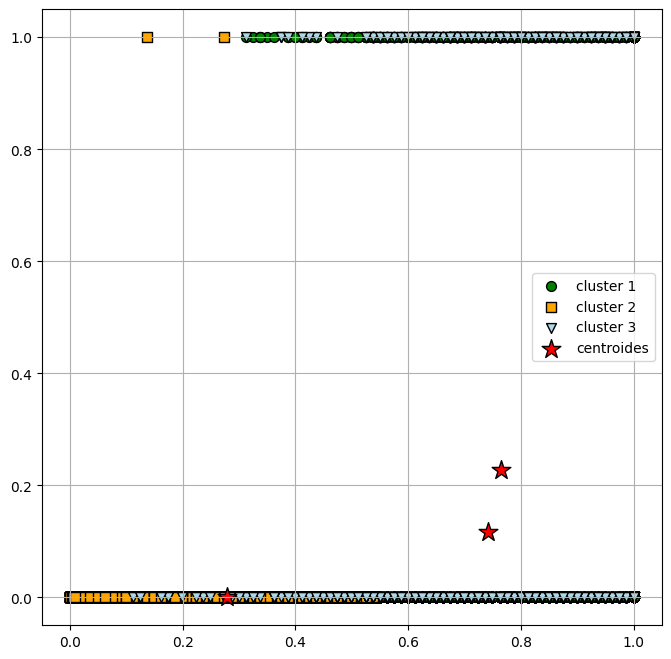

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(df[y_km == 0][0], df[y_km == 0][1],
            s=50, c='green', marker='o',
            edgecolor='black', label='cluster 1')
plt.scatter(df[y_km == 1][0], df[y_km == 1][1],
            s=50, c='orange', marker='s',
            edgecolor='black', label='cluster 2')
plt.scatter(df[y_km == 2][0], df[y_km == 2][1],
            s=50, c='lightblue', marker='v',
            edgecolor='black', label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1], s=200,
            marker='*', c='red',
            edgecolor='black', label='centroides')
plt.legend(loc="best")
plt.grid()
plt.show()

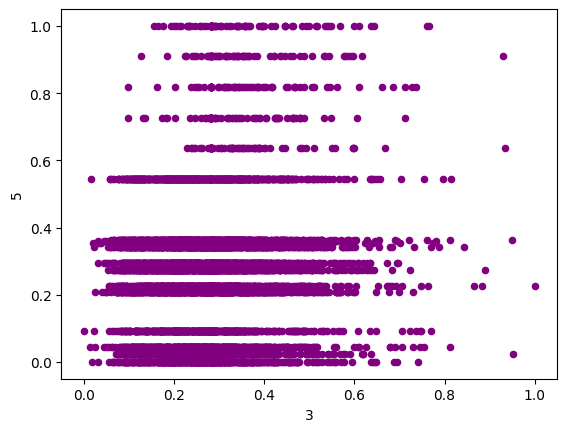

In [ ]:
df.plot.scatter(x=3, y=5, c='purple')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'WCSS')

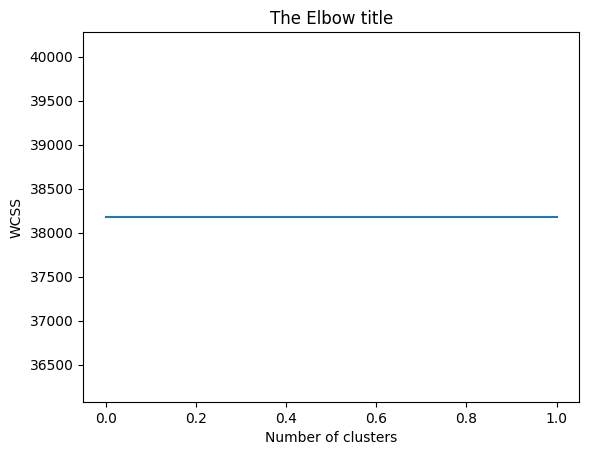

In [ ]:
#Encontrando numero de clusters WCSS and elbow method wcss=[]

import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []  # Initialize wcss as an empty list

for i in np.arange(0, 2):
  kmeans = KMeans (1)
  kmeans.fit(x)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(0, 2)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

#Selección de Modelos

## Modelo Naïve Bayes

In [ ]:
SVM

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [ ]:
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,73.0,0,0,26.62,5.0,155,0
1,35.0,0,0,27.32,4.5,130,0
2,38.0,0,0,27.32,6.2,130,0
3,75.0,0,0,31.11,6.2,159,0
4,51.0,0,0,39.57,6.2,240,1


In [ ]:
from sklearn.svm import SVC #Support Vector Classifier
from sklearn.pipeline import make_pipeline

In [ ]:
X_train = [[1, 2], [3, 4], [5, 6]]
y_train = [0, 1, 1]

In [ ]:
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(x_test)
print(y_pred)

NameError: name 'x_test' is not defined

In [ ]:
SupportVectorMachine = SVC()
SupportVectorMachine.fit(HbA1c_level, blood_glucose_level)
y_pred = SupportVectorMachine.predict(x_test)

NameError: name 'HbA1c_level' is not defined

#Nuevo intento

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score


In [ ]:
# Cargar el conjunto de datos (reemplaza 'dataset.csv' con el nombre de tu archivo)
data = pd.read_csv('dataset.csv')

In [ ]:
# Dividir los datos en características (X) y etiquetas (y)
X = data.drop('HbA1c_level', axis=1)  # Ajusta 'target_column_name' al nombre de tu columna objetivo
y = data['HbA1c_level']

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Inicializar el clasificador Naive Bayes (en este caso, usaremos el Gaussiano)
model = BernoulliNB()

In [ ]:
y_train.head()

75220    3.5
48955    5.7
44966    4.0
13568    5.0
92727    4.5
Name: HbA1c_level, dtype: float64

In [ ]:
X_train.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,blood_glucose_level,diabetes
75220,Male,73.0,0,0,former,24.77,80,0
48955,Male,80.0,0,0,never,24.60,145,1
44966,Female,38.0,0,0,ever,24.33,158,0
13568,Female,26.0,0,0,not current,18.87,100,0
92727,Female,61.0,1,0,current,22.11,85,0


In [ ]:
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Male'

In [ ]:
y_pred = model.predict(X_test)

ValueError: could not convert string to float: 'Female'